# Importing The Librarires

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Reading the dataset

In [235]:
pb=pd.read_csv(r'FuelConsumptionCo2.csv')

In [236]:
pb.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [237]:
#Displaying first 10 values to get a basic idea
pb.shape

(1067, 13)

In [238]:
pb.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## Pre Processing

In [239]:
pb.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [240]:
#Since Model Year has only 1 unique value it is constant, 
#so we can drop it as constant features don't help in prediction machine learning models
pb.drop(["MODELYEAR"],axis=1,inplace=True)

In [241]:
pb = pb.drop_duplicates()

In [242]:
# Shape after dropping columns
pb.shape

(1067, 12)

In [243]:
pb.dtypes

MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

## Exploratory Data Analysis

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='Density'>

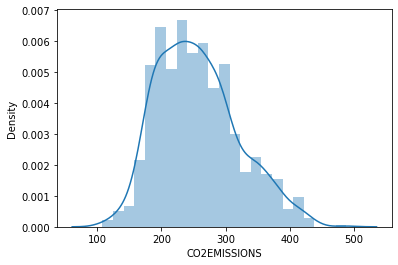

In [244]:
#The distribution of target variable
sns.distplot(pb['CO2EMISSIONS'])

In [245]:
features = pb[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


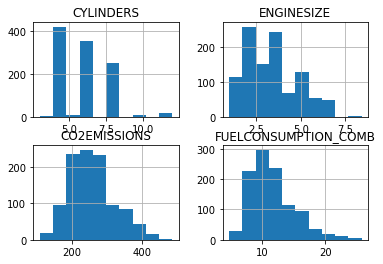

In [246]:
viz = features[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

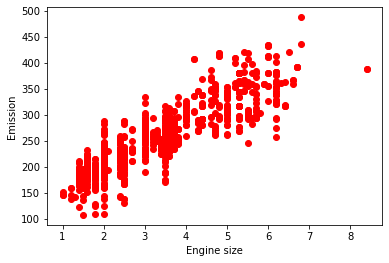

In [247]:
plt.scatter(features.ENGINESIZE, features.CO2EMISSIONS,  color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

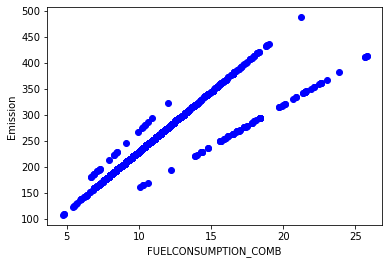

In [248]:
plt.scatter(features.FUELCONSUMPTION_COMB, features.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

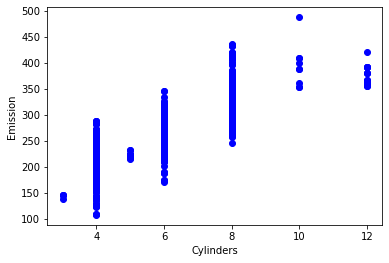

In [249]:
plt.scatter(features.CYLINDERS, features.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

## Feature Engineering

In [250]:
#Label Encoding of Object Type Features

In [251]:
MAKE_encoder = LabelEncoder()
MAKE_encoder.fit(pb['MAKE'])
pb['MAKE_enc'] = MAKE_encoder.transform(pb['MAKE'])

In [252]:
VEHICLECLASS_encoder = LabelEncoder()
VEHICLECLASS_encoder.fit(pb['VEHICLECLASS'])
pb['VEHICLECLASS_enc'] = VEHICLECLASS_encoder.transform(pb['VEHICLECLASS'])

In [253]:
TRANSMISSION_encoder = LabelEncoder()
TRANSMISSION_encoder.fit(pb['TRANSMISSION'])
pb['TRANSMISSION_enc'] = TRANSMISSION_encoder.transform(pb['TRANSMISSION'])

In [254]:
FUELTYPE_encoder = LabelEncoder()
FUELTYPE_encoder.fit(pb['FUELTYPE'])
pb['FUELTYPE_enc'] = FUELTYPE_encoder.transform(pb['FUELTYPE'])

In [255]:
pb.drop(['MODEL','MAKE','VEHICLECLASS','TRANSMISSION','FUELTYPE'],axis=1,inplace=True)

In [256]:
pb.dtypes

ENGINESIZE                  float64
CYLINDERS                     int64
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
MAKE_enc                      int32
VEHICLECLASS_enc              int32
TRANSMISSION_enc              int32
FUELTYPE_enc                  int32
dtype: object

### Test Train Split 

In [257]:
# Converting the pb into X and y so we can split them in train_test_split function

# X contains the dataframe without the target column
X = pb.drop('CO2EMISSIONS',axis=1)
y = pb['CO2EMISSIONS']

In [258]:
X_train, X_test_initially = train_test_split(X,test_size=.30,shuffle=True,random_state=0)
X_train.shape,X_test_initially.shape

((746, 10), (321, 10))

In [259]:
X_val, X_test = train_test_split(X_test_initially,test_size=.50,shuffle=True,random_state=0)
X_val.shape,X_test.shape

((160, 10), (161, 10))

In [260]:
y_train, y_test_initally = train_test_split(y,test_size=.30,shuffle=True,random_state=0)
y_train.shape,y_test_initally.shape

((746,), (321,))

In [261]:
y_val, y_test = train_test_split(y_test_initally,test_size=.50,shuffle=True,random_state=0)
y_val.shape,y_test.shape

((160,), (161,))

Text(0.5, 1.0, 'Heatmap of Correlation')

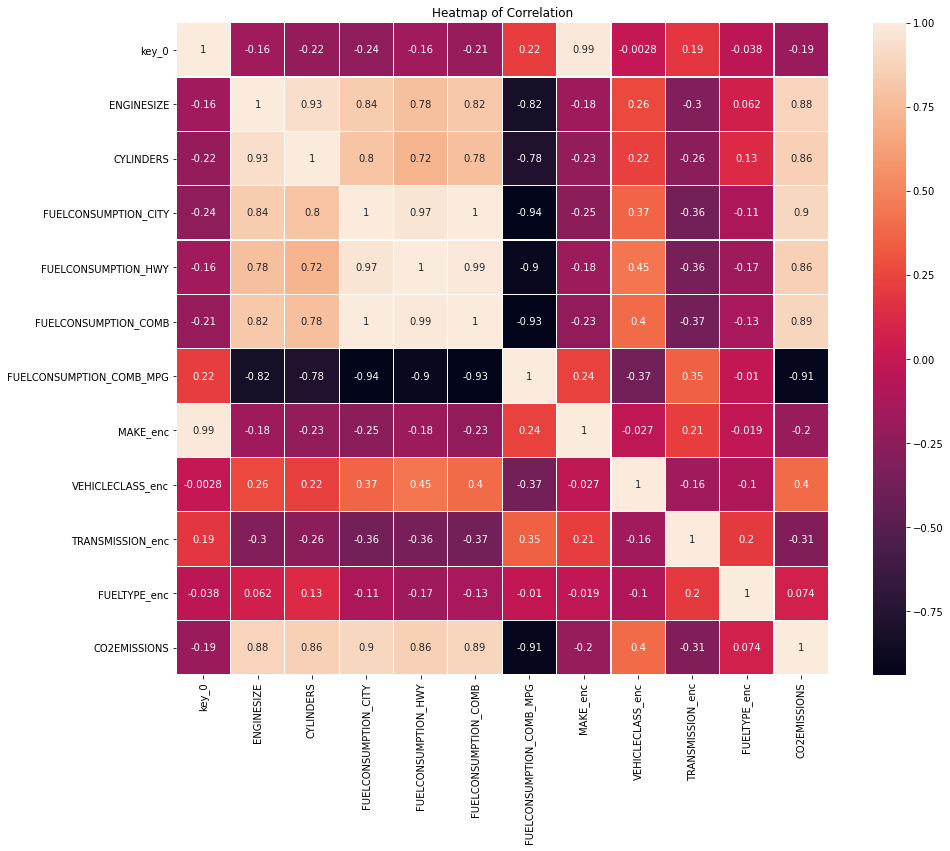

In [262]:
# Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(X_train.merge(y_train,on=X_train.index).corr(),linewidths=0.1,vmax=1,linecolor='white',square=True,annot=True)
plt.title("Heatmap of Correlation")

# Model Creation and Selection

In [263]:
X_train.dtypes

ENGINESIZE                  float64
CYLINDERS                     int64
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
MAKE_enc                      int32
VEHICLECLASS_enc              int32
TRANSMISSION_enc              int32
FUELTYPE_enc                  int32
dtype: object

In [264]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)
y_predict = base_model.predict(X_val)

In [265]:
#CALCULATING MEAN SQUARED ERROR 
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_val, y_predict))
score=r2_score(y_val, y_predict)
print(score)

435.3709656036822
0.8980549922252742


## Decision Tree Regressor

In [266]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=6,max_depth=5)
regressor.fit(X_train,y_train)
y_predict2=regressor.predict(X_val)
R2_Score = []

In [267]:
#CALCULATING R2 SCORE VALUE
from sklearn.metrics import r2_score
score=r2_score(y_val, y_predict2)
print(score)
R2_Score.append(score)

0.9573958536577682


## Random Regressor

In [268]:
from sklearn.metrics import r2_score
from sklearn.ensemble import  RandomForestRegressor
random=RandomForestRegressor()
random.fit(X_train,y_train)
y_pred=random.predict(X_val)
print((r2_score(y_val,y_pred))*100)
#CALCULATING R2 SCORE VALUE and multipying with 100 to get accuracy

98.10875702432226


In [269]:
import xgboost as xgb
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_val)
R2_Score.append(r2_score(y_val, predicted))
score = clf.score(X_val, y_val)
print(score)
R2_Score.append(score)

0.9946922840155464


## XG Boost Regressor

In [270]:
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
r2_score(y_test, predicted)

0.9984864276195256

In [271]:
R2_Score

[0.9573958536577682, 0.9946922840155464, 0.9946922840155464]

# Conclusion

1.Since the all the features are highly correlated to target column we get high accuracy on all the models.<br>
2.XG Boost Regressor gave the best accuracy.